<a href="https://colab.research.google.com/github/jniquiri/Talento_Tech/blob/main/Clasificador_frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###*TITULO:*
*Clasificación de frutas según sus características.*

###*OBJETIVO:*
*Desarrollar un modelo de clasificación para categorizar las frutas de acuerdo a sus características.*

###*INTRODUCCION:*
*Las tareas de clasificación en machine learning son métodos supervisados en el que un modelo intenta predecir la etiqueta correcta de unos datos de entrada dados. En la clasificación, el modelo se entrena completamente con datos de entrenamiento y luego se evalúa con datos de prueba, para finalmente realizar previsiones con nuevos datos no vistos.*

*Estos modelos tienen aplicaciones en diferentes contextos de nuestra vida real como diagnóstico médico, clasificación de correos electrónicos, reconocimiento de imágenes, análisis de sentimientos en redes sociales, predicción del tiempo, recomendación de productos entre otros.*

*En la tarea elegida se busca clasificar la calidad de las frutas de acuerdo a unas características de datos de entrada, para llevar a cabo la tarea se utilizará un dataset descargado de la plataforma KAGGLE, Apple Quality, y se explorará los rendimientos con tres modelos distintos.*


###*Dataset Apple Quality*
*Descripción: Este conjunto de datos contiene información sobre varios atributos de un conjunto de frutas, lo que proporciona información sobre sus características. El conjunto de datos incluye detalles como la identificación de la fruta, el tamaño, el peso, la dulzura, la textura crujiente, la jugosidad, la madurez, la acidez y la calidad.*

*Características principales:*
- *A_id: Identificador único para cada fruta.*
- *Tamaño: Tamaño de la fruta.*
- *Peso: Peso de la fruta.*
- *Dulzor: Grado de dulzor de la fruta.*
- *Crujiente: Textura que indica el crujiente de la fruta.*
- *Juosidad: Nivel de jugosidad de la fruta.*
- *Maduración: Etapa de madurez del fruto.*
- *Acidez: Nivel de acidez de la fruta.*
- *Calidad: Calidad general de la fruta.*



###*1.0 Importación de librerías*

*Se importan las librerías necesarias para cargar, explorar y analizar el dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
plt.style.use('dark_background')
#%matplotlib inline
#plt.rcParams['figure.figsize'] = (16, 8)
#plt.style.use('ggplot')

###*2.0 Cargue datos*
*cargamos y mostramos los primeros datos del dataset*

In [ ]:
dt_frutas = pd.read_csv('apple_quality.csv')
dt_frutas.head()


,A_id,Tamano,Peso,Dulzor,Crujiente,Jugosidad,Maduracion,Acidez,Calidad
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


###*3.0 Exploración y análisis de datos*
*   *Columns: listar las etiquetas de las columnas del dataset*
*   *dtypes. Serie con los tipos de cada una de las columnas.*
*   *describe. Estadísticas descriptivas incluyendo aquellas que sumarizan la tendencia central, dispersión y forma de la distribución, excluyendo los valores nulos. Analiza tanto tipos numéricos como de objetos, así como también con datos mixtos. La salida que se obtiene depende de qué es lo que se le provee.*
*   *info. Imprime información del df, incluyendo el tipo del index y las columnas, los valores no nulos y el uso de memoria.*


####*Verificamos que no hayan columnas duplicadas.*
*Para borrarlas, podemos utilizar el método drop_duplicates*

In [ ]:
dt_frutas = dt_frutas.drop(['A_id'], axis=1)
dt_frutas.head()

,Tamano,Peso,Dulzor,Crujiente,Jugosidad,Maduracion,Acidez,Calidad
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [ ]:
#dt_frutas.duplicated().sum()
dt_frutas.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3995,False
3996,False
3997,False
3998,False


In [ ]:
dt_frutas.tail()
#dt_frutas.iloc[:10]

,Tamano,Peso,Dulzor,Crujiente,Jugosidad,Maduracion,Acidez,Calidad
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [ ]:
#Se chequea que no hayan filas duplicadas
print('-----------------------------------')
print('Chequeo de filas repetidas')
print(dt_frutas.duplicated().sum())
print('------------------------------------')

-----------------------------------
Chequeo de filas repetidas
0
------------------------------------


In [ ]:
print('----------------')
print('Data shape:')
print(dt_frutas.shape)
print('----------------')

----------------
Data shape:
(4000, 8)
----------------


In [ ]:
dt_frutas


,Tamano,Peso,Dulzor,Crujiente,Jugosidad,Maduracion,Acidez,Calidad
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [ ]:
print("Estructura de los datos:")
print("***********************************")
print(dt_frutas.columns)
print(dt_frutas.dtypes)

Estructura de los datos:
***********************************
Index(['Tamano', 'Peso', 'Dulzor', 'Crujiente', 'Jugosidad', 'Maduracion',
       'Acidez', 'Calidad'],
      dtype='object')
Tamano        float64
Peso          float64
Dulzor        float64
Crujiente     float64
Jugosidad     float64
Maduracion    float64
Acidez        float64
Calidad        object
dtype: object


*Mostramos información general del dataset*

In [ ]:
dt_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tamano      4000 non-null   float64
 1   Peso        4000 non-null   float64
 2   Dulzor      4000 non-null   float64
 3   Crujiente   4000 non-null   float64
 4   Jugosidad   4000 non-null   float64
 5   Maduracion  4000 non-null   float64
 6   Acidez      4000 non-null   float64
 7   Calidad     4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


*Siete columnas tienen tipos de datos numéricos y la última tipo object, datos completos y no hay valores nulos ni campos vacios.*

In [ ]:
print("Estadísticas descriptivas:  ")
print("***************************")
dt_frutas.describe().T

Estadísticas descriptivas:  
***************************


,count,mean,std,min,25%,50%,75%,max
Tamano,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Peso,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Dulzor,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crujiente,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Jugosidad,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Maduracion,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidez,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


####*El dataset muestra estadísticas para todas las columnas, excluyendo valores NaN. Vamos a obtener: cantidad de valores, media, desviación standard, valor mínimo, percentiles y valor máximo para cada columna.*

In [ ]:
#Se comprueba si existe algún valor ausente en el dataset con isnull().values.any()
print('-----------------------------')
print('Chequeo de campos vacios')
print(dt_frutas.isnull().sum())
print('-----------------------------')

-----------------------------
Chequeo de campos vacios
Tamano        0
Peso          0
Dulzor        0
Crujiente     0
Jugosidad     0
Maduracion    0
Acidez        0
Calidad       0
dtype: int64
-----------------------------


###*Visualización de la información*
*Graficamos la distribución categórica de la variable objetivo*

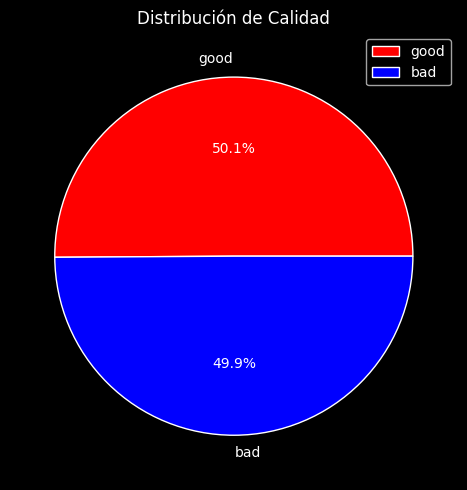

In [ ]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
#dt_manzanas['Calidad'].value_counts().plot.pie(autopct="%1.1f%%");
plt.figure(figsize=(5, 5))

plt.pie(dt_frutas['Calidad'].value_counts(), labels=['good', 'bad'], autopct='%1.1f%%', colors=['red', 'blue'])
plt.legend()
plt.title('Distribución de Calidad')
plt.tight_layout()
plt.show()

####*En la gráfica podemos observar que la distribución de clases está equilibrada*

In [ ]:
dt_frutas.groupby('Calidad').size()
#print(df['Calidad'].value_counts())

,0
Calidad,
bad,1996
good,2004


####*Graficamos cada atributo de la fruta*

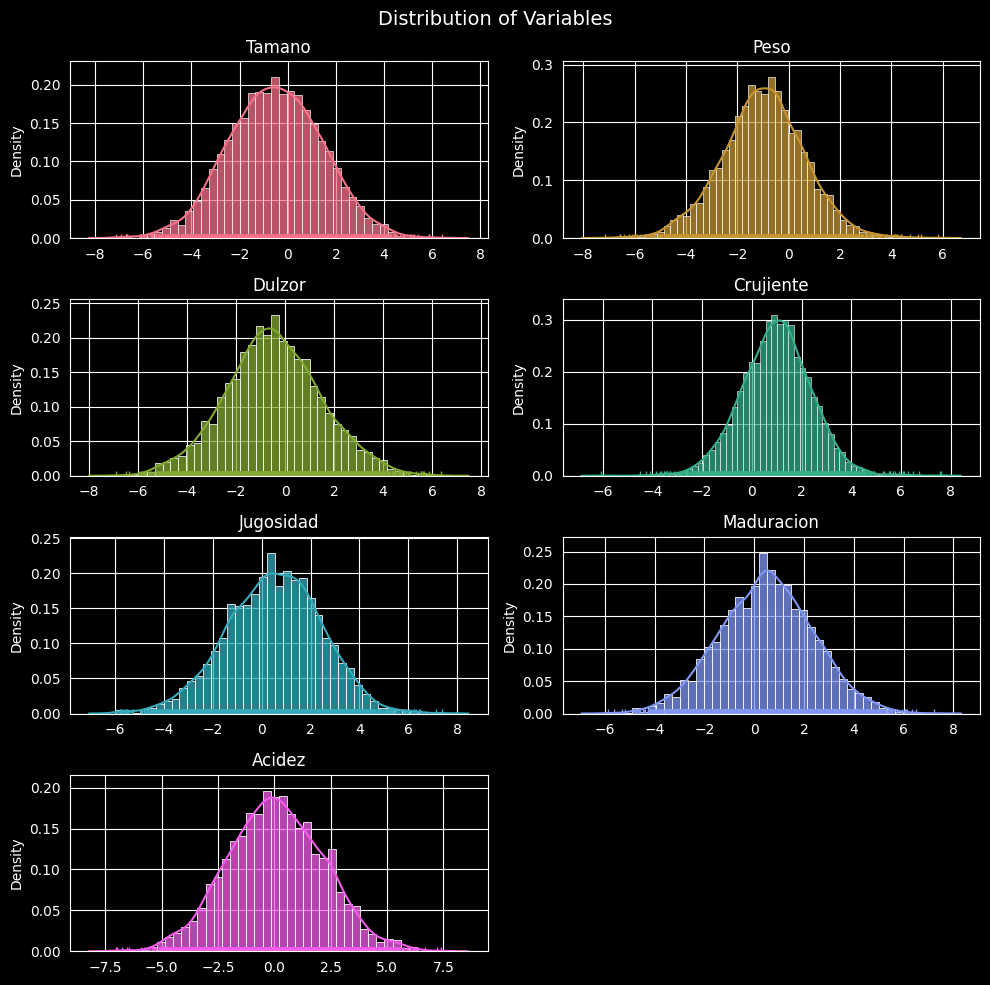

In [ ]:
# Análisis de cada atributo de la fruta
cols = dt_frutas.columns[:-1]
colors = sns.color_palette('husl', len(cols))  # husl = hue saturation lightness

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))  # 3 rows, 3 columns
axs = axs.flatten()  # flatten the 2D array to 1D array

for i, col in enumerate(cols):
    sns.kdeplot(dt_frutas[col], ax=axs[i], color=colors[i])  # kdeplot = kernel density estimation plot
    sns.histplot(dt_frutas[col], ax=axs[i], color=colors[i], stat='density')  # histplot = histogram plot
    sns.rugplot(dt_frutas[col], ax=axs[i],
                color=colors[i])  # rugplot = draw a dash mark for every point on a univariate distribution

    axs[i].set_xlabel('')  # remove x label to avoid redundancy
    axs[i].set_title(col)
    plt.tight_layout()

fig.suptitle("Distribution of Variables", fontsize=14)
fig.delaxes(ax=axs[len(cols)])  # delete the last plot
fig.tight_layout()

####*Se puede observar en cada gráfico que los datos estan en el rango (-5, 5) con una mayor frecuencia en torno al valor (0,0) y con la forma de la campana, hace que sea una distribución normal estandar.*

###*Datos estadísticos*

In [ ]:
dt_frutas.describe().T

,count,mean,std,min,25%,50%,75%,max
Tamano,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Peso,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Dulzor,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crujiente,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Jugosidad,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Maduracion,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidez,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


###*Graficamos la matriz de dispersión de seaborn*

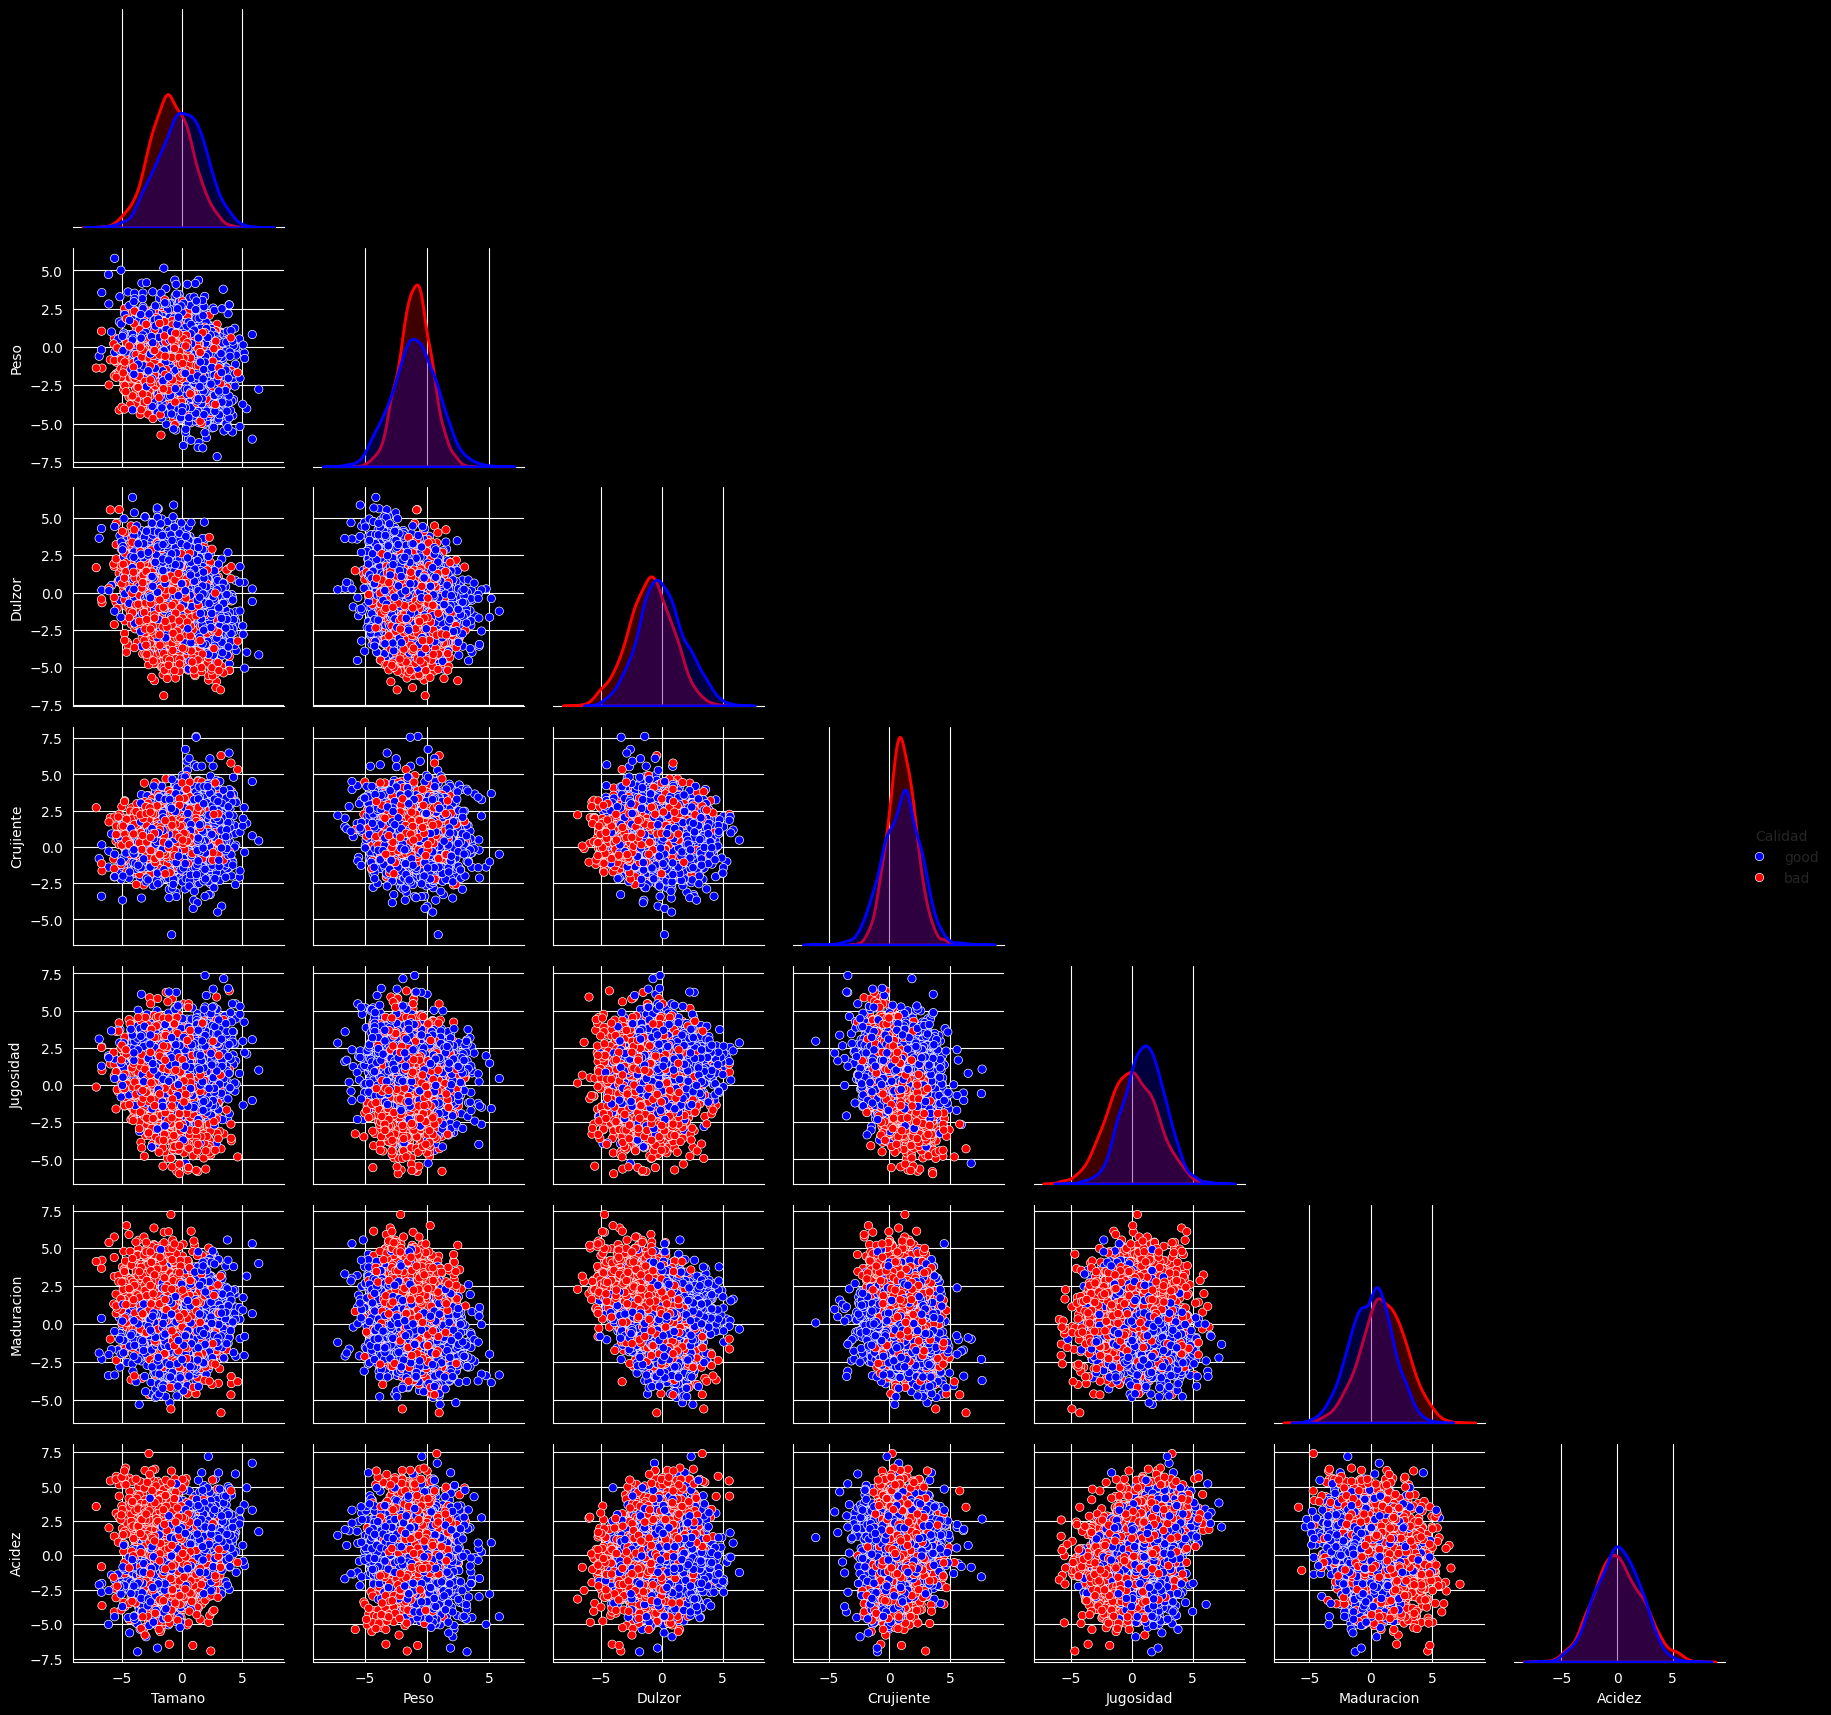

In [ ]:
custom_platte = {'good': '#0000ff', 'bad': '#ff0000'}  # red, blue
pair_grid = sns.PairGrid(dt_frutas, hue='Calidad', palette=custom_platte,
                         corner=True)  # hue = label, palette = color palette corner = True to show only the lower triangle  husl = hue saturation lightness
pair_grid.map_lower(sns.scatterplot)  # scatterplot for lower triangle
pair_grid.map_diag(sns.kdeplot, fill=True, linewidth=2.1)  # kdeplot for diagonal

sns.set_style('darkgrid')
pair_grid.add_legend()
plt.show()


####*La figura anterior muestra la relación entre cada par de atributos.*
*Podemos ver que los puntos se concentran en el rango (-5, 5) sobre el eje "X"; y en el rango (-5, 5) sobre el eje "y". Y la dispersión es más ancha sobre el eje "y".*

###*Matriz de correlación*
*Revisando visualmente a través de un mapa de calor los coeficientes de correlación entre pares de características cuantitativas.*
*Las correlaciones positivas se representan en colores más cálidos (más cercanos a 1), generalmente tonos de rojo.*
*Las correlaciones negativas se representan en colores más fríos (más cercanos a -1), generalmente tonos de azul.*
*La ausencia de correlación se representa en colores neutros, cercanos a 0.*

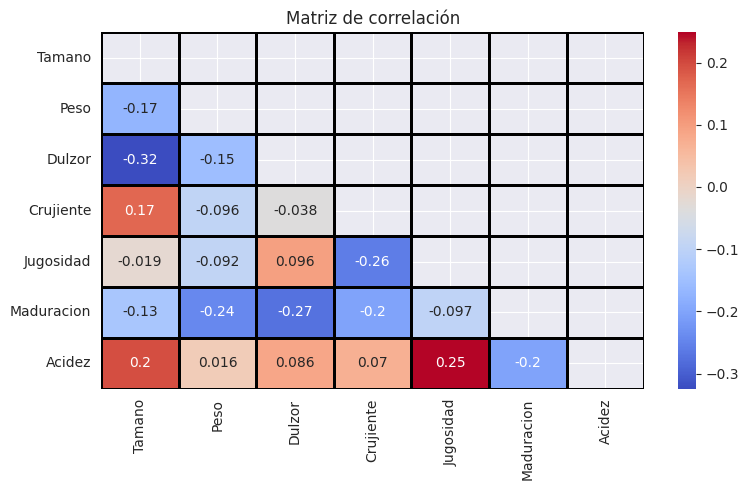

In [ ]:
cols = dt_frutas.columns[:-1]
correlation_frutas = dt_frutas[cols].corr()
mask = np.triu(np.ones_like(correlation_frutas, dtype=bool))  # Máscara para ocultar el triángulo superior de la matriz.
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_frutas, mask=mask, annot=True, cmap='coolwarm', linewidths=1,
            linecolor='black')  # annot = True --> muestra lo valores dentro de la celda
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

*En la matriz de correlación podemos observar que no existen fuertes correlaciones entre los atributos por lo que se pueden tener encuenta todas las variables para la taea de entrenamiento del modelo de clasificación.*

###*4.0 Preprocesamiento de datos*
*Etapa de limpieza, preparación de datos, manejo de datos faltantes y normalización de cacterísticas. Conversión de la columna Calidad a valores binarios para el  procesamiento.*

In [ ]:

dt_frutas['Calidad'] = (dt_frutas['Calidad'] == 'good').astype(int)  # good = 1, bad = 0

In [ ]:
dt_frutas

,Tamano,Peso,Dulzor,Crujiente,Jugosidad,Maduracion,Acidez,Calidad
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


###*4.1 Preparando los datos para entrenar modelos*
*Aquí, en la etapa de preparación de los datos, crearemos una partición para tener un conjunto de datos de entrenamiento y un conjunto de datos de validación.*

In [ ]:
#Primero dividimos los datos en "X" and "y"
X = dt_frutas.iloc[:, :-1] #incluye los datos de las COL [0] a COL[6]
y = dt_frutas['Calidad']   #incluye los datos de la COL[7] etiqueta de clasificación

print(X.shape)
print(y.shape)

(4000, 7)
(4000,)


In [ ]:
#Dividimos los datos en conjuntos de entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split as tts
X_train, X_pruebas, y_train, y_pruebas = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% entrenamiento y 30% prueba
                                                                          #random_state es la semilla (valor arbitrario)
                                                                          #que se utiliza para inicializar el generador de números aleatorios
                                                                          #y garantizar la reproducibilidad de los resultados

In [ ]:
#Dividir el conjunto de prueba en subconjuntos de prueba y validación
X_test, X_val, y_test, y_val = train_test_split(X_pruebas, y_pruebas, test_size=0.2, random_state=42)  # 80% entrenamiento y 20% prueba

# random_state: Se utiliza para la reproducibilidad. Esto significa que la división será la misma cada vez que se ejecute el código,
#lo que resulta útil para depurar y comparar modelos. El número 42 es arbitrario y se puede utilizar cualquier número.
print('-'*30)
print("Y train value counts:")
print(y_train.value_counts())
print('-'*30)
print('Y validation value counts:')
print(y_val.value_counts())
print('-'*30)
print('Y test value counts:')
print(y_test.value_counts())
print('-'*30)
print('Verificando datos de entrenamiento, validación y prueba')
print('-'*30)
print('Q X_train', X_train.shape)
print('Q y_train', y_train.shape)
print('Q X_test', X_test.shape)
print('Q y_test', y_test.shape)
print('Q X_val', X_val.shape)
print('Q y_val', y_val.shape)
print('-'*30)

------------------------------
Y train value counts:
Calidad
0    1403
1    1397
Name: count, dtype: int64
------------------------------
Y validation value counts:
Calidad
0    131
1    109
Name: count, dtype: int64
------------------------------
Y test value counts:
Calidad
1    498
0    462
Name: count, dtype: int64
------------------------------
Verificando datos de entrenamiento, validación y prueba
------------------------------
Q X_train (2800, 7)
Q y_train (2800,)
Q X_test (960, 7)
Q y_test (960,)
Q X_val (240, 7)
Q y_val (240,)
------------------------------


####*Los datos se dividen perfectamente en conjuntos de entrenamiento, validación y prueba.*

####*Procedemos a crear modelos que permitan resolver el problema de clasificación.*

In [ ]:
y_train.isnull().sum()  #No hay valores nulos en el conjunto de entrenamiento

0

###*5.0 Modelo de clasificación SVC (support Vector Classifier)*
*Es una implementación específica de las Máquinas de Vectores de Soporte que se utiliza para la clasificación de datos. Su objetivo principal es encontrar el mejor margen de separación entre las clases en un espacio de características.*

In [ ]:
from sklearn.svm import SVC #Algortimo de ML
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

*Configuración y entrenamiento del modelo*

In [ ]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

*Rendimiento y desempeo del clasificador con diferentes subconjuntos*

In [ ]:
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

val_score = model.score(X_val, y_val)
print(f'Val score of trained model: {val_score*100}')

Train score of trained model: 89.53571428571429
Test score of trained model: 90.10416666666666
Val score of trained model: 88.75


###*5.1 Evaluando el  modelo*
*A través de la matriz de confusión observamos el rendimiento del algoritmo de clasificación*


Matriz de confusión: 
[[417  50]
 [ 45 448]]



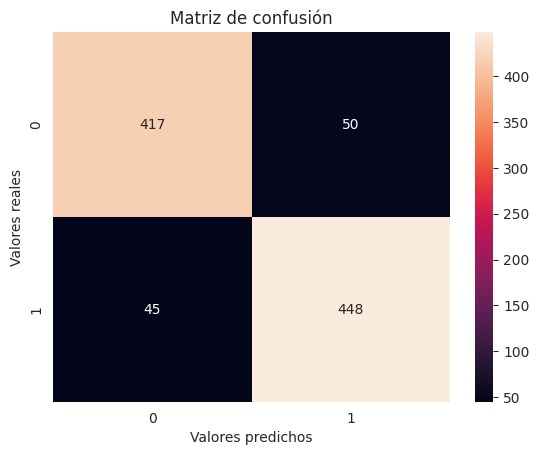

In [ ]:
conf_matrix = confusion_matrix(pred, y_test)
print(f'Matriz de confusión: \n{conf_matrix}\n')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

###*Informe de clasificación con las métricas de presición, recall, f1-score*

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       462
           1       0.91      0.90      0.90       498

    accuracy                           0.90       960
   macro avg       0.90      0.90      0.90       960
weighted avg       0.90      0.90      0.90       960



###*La Curva ROC (Receiver Operating Characteristic)*
*Es una herramienta gráfica utilizada para evaluar el rendimiento de un modelo de clasificación. En particular, se utiliza para visualizar la capacidad de un modelo para distinguir entre clases positivas y negativas a medida que se ajustan diferentes umbrales de decisión.*

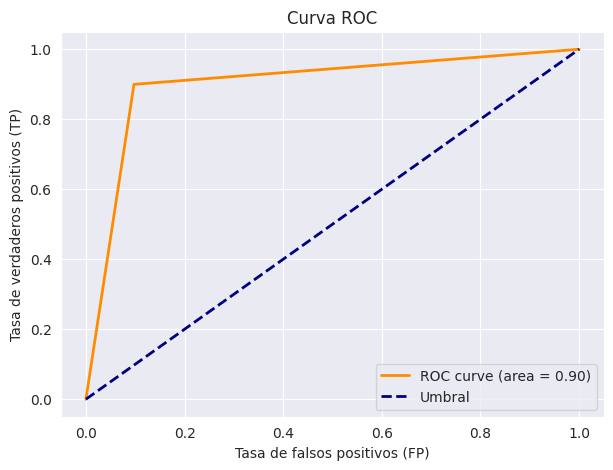

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

# Graficar la curva ROC
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Umbral')
plt.xlabel('Tasa de falsos positivos (FP)')
plt.ylabel('Tasa de verdaderos positivos (TP)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
thresholds

array([inf,  1.,  0.])

####*Uso del modelo para predecir:*
*Probamos el modelo con datos de entrada*

In [ ]:
Datos_prueba= pd.DataFrame({"Tamano": [0], "Peso":[1], "Dulzor": [0], "Crujiente": [1], "Jugosidad": [1], "Maduracion": [1], "Acidez":[2]})
print('+'*50)
print('Clasificando categoría según modelo SVC')
print('+'*50, '\n')
#print(model.predict(Datos_prueba))
print(model.predict(X_val), '\n')
print('+'*50)



++++++++++++++++++++++++++++++++++++++++++++++++++
Clasificando categoría según modelo SVC
++++++++++++++++++++++++++++++++++++++++++++++++++ 

[0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0] 

++++++++++++++++++++++++++++++++++++++++++++++++++


###*5.2 Modelo de clasificación KNN*

- *Verificar que se tenga las librerías necesarias para hacer el trabajo*.
- *Cargar el dataset*.
- *Dividimos los datos en las variables "X" and "y" - variable objetivo y características.*
- *Dividir el dataset en conjuntos de entrenamiento, prueba y validación.*
- *Crear y entrenar el modelo KNN.*
- *Visualizar la información.*

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

####*Evaluación del modelo de vecinos cercanos para obtener el mejor valor para KNN*

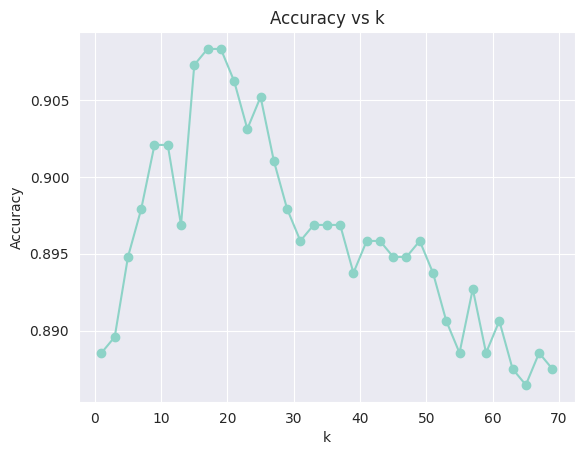

Best k: 17


In [ ]:
# @title Texto de título predeterminado
test_k = [i for i in range(1, 70, 2)]
train_acc = []

for k in test_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc.append(accuracy_score(y_test, y_pred))

plt.plot(test_k, train_acc, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

best_validation_k = test_k[train_acc.index(max(train_acc))]
print(f'Best k: {best_validation_k}')

####*Evaluando el modelo con vecinos KNN=1, KNN=3, KNN=10, KNN=30 y con el mejor KNN para analizar y observar su rendimiento a través de la matriz de confusión y los reportes de clasificción de las métricas: presición, recall, f1-score y accuracy.*

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_30 = KNeighborsClassifier(n_neighbors=30)
knn_validation_best = KNeighborsClassifier(n_neighbors=best_validation_k)
knn_models = [knn_1, knn_3, knn_10, knn_30, knn_validation_best]

for model in knn_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('---------------- K = {} ----------------'.format(model.n_neighbors))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print('--------------------------------------')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('--------------------------------------')
    print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
    print('--------------------------------------')

---------------- K = 1 ----------------
Accuracy: 0.8885416666666667
--------------------------------------
Confusion Matrix: 
[[403  59]
 [ 48 450]]
--------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       462
           1       0.88      0.90      0.89       498

    accuracy                           0.89       960
   macro avg       0.89      0.89      0.89       960
weighted avg       0.89      0.89      0.89       960

--------------------------------------
---------------- K = 3 ----------------
Accuracy: 0.8895833333333333
--------------------------------------
Confusion Matrix: 
[[409  53]
 [ 53 445]]
--------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       462
           1       0.89      0.89      0.89       498

    accuracy                           0.89 

####*Matriz de confusión con el mejor K*

Matriz de confusión: 
[[422  40]
 [ 48 450]]



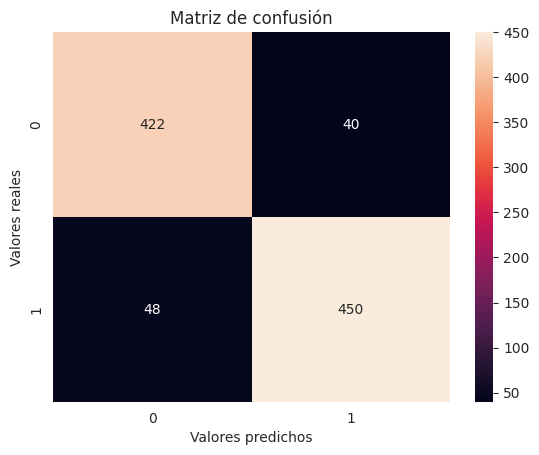

In [ ]:
K = best_validation_k
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión: \n{conf_matrix}\n')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

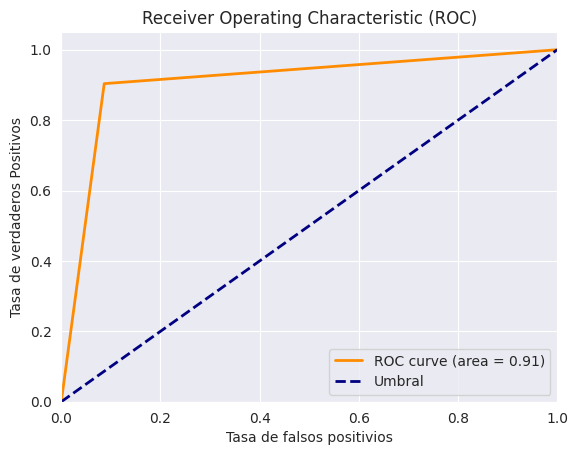

In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Umbral')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivios')
plt.ylabel('Tasa de verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


####*Uso del modelo para predecir:*
*Probamos el modelo con datos de entrada*

In [ ]:
Prueba_knn = knn.predict(X_val)
print('+'*50)
print('Clasificando categoría según modelo KNN')
#print(model.predict(Datos_prueba))
print('+'*50, '\n')
print(Prueba_knn)
print('+'*50)

++++++++++++++++++++++++++++++++++++++++++++++++++
Clasificando categoría según modelo KNN
++++++++++++++++++++++++++++++++++++++++++++++++++ 

[0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0
 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0]
++++++++++++++++++++++++++++++++++++++++++++++++++


###*5.3 Modelando con regresión logística*
*La regresión logística también es un clasificador binario que puede proporcionar probabilidades para modelar el dataset de trabajo.*
*Debemos verificar que se tenga las librerías necesarias para hacer el modelado*
*Como siempre los pasos son:*
- *Verificar que se tenga las librerías necesarias para hacer el trabajo.*
- *Cargar el dataset.*
- *Dividimos los datos en las variables "X" and "y" - variable objetivo y características.*
- *Dividir el dataset en conjuntos de entrenamiento, prueba y validación.*
- *Crear y entrenar el modelo de regresión logística.*
- *Visualizar la información.*


In [ ]:
import sklearn.linear_model as linear_model
from sklearn import model_selection
#Creando y entrenando el modelo
log_regresion = LogisticRegression()
log_regresion.fit(X_train, y_train)

#Haciendo predicciones
y_predict_reg = log_regresion.predict(X_test)

In [ ]:
#Validando el score del modelo de regresión logística
score_model = log_regresion.score(X_train, y_train)
print('+' *30)
print("Score del modelo: ", round(score_model, 2)*100, "%")
print('+' *30)

++++++++++++++++++++++++++++++
Score del modelo:  74.0 %
++++++++++++++++++++++++++++++


In [ ]:
#Matriz de confusión
print("*" * 30)
print("Matriz de confusión logística")
print(confusion_matrix(y_test, y_predict_reg))


******************************
Matriz de confusión logística
[[351 111]
 [120 378]]


Matriz de confusión: 
[[351 111]
 [120 378]]



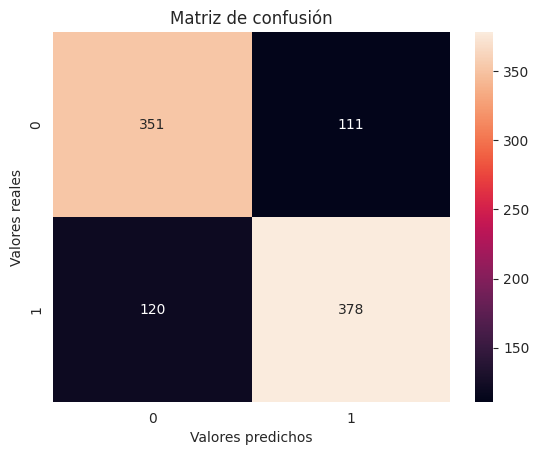

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict_reg)
print(f'Matriz de confusión: \n{conf_matrix}\n')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
print(classification_report(y_test, y_predict_reg))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       462
           1       0.77      0.76      0.77       498

    accuracy                           0.76       960
   macro avg       0.76      0.76      0.76       960
weighted avg       0.76      0.76      0.76       960



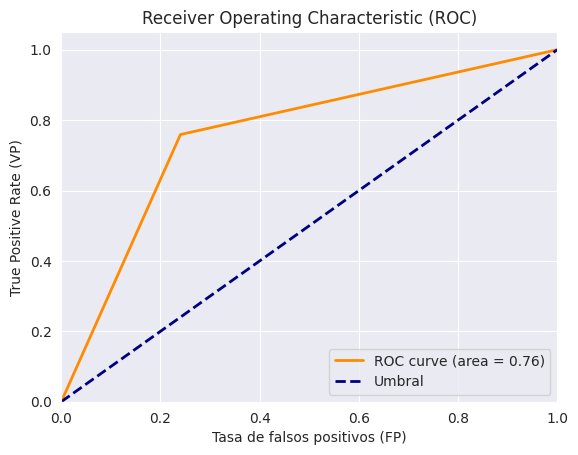

In [ ]:
# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_predict_reg)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Umbral')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FP)')
plt.ylabel('True Positive Rate (VP)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


####*Uso del modelo para predecir:*
*Probamos el modelo con datos de entrada*

In [ ]:
Resultado = log_regresion.predict(X_val)
#Resutado = log_regresion.predict(Datos_prueba)
print('+'*70)
print('Clasificando categoría según modelo de regresión logística')
print('+'*70, '\n')
print(Resultado)
print('+'*70)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Clasificando categoría según modelo de regresión logística
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

[0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
# Crear un DataFrame con las predicciones y las verdaderas etiquetas
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_reg})

# Identificar errores
errors = results[results['Actual'] != results['Predicted']]

# Análisis de errores
print("Errores de predicción:\n", errors)

# Opcional: contar el número de errores por clase
error_counts = errors['Actual'].value_counts()
print("Conteo de errores por clase:\n", error_counts)
print(errors.describe().T)

Errores de predicción:
       Actual  Predicted
999        0          1
505        1          0
1429       0          1
3225       0          1
1490       0          1
...      ...        ...
258        1          0
1788       1          0
3860       0          1
1815       1          0
1322       0          1

[231 rows x 2 columns]
Conteo de errores por clase:
 Actual
1    120
0    111
Name: count, dtype: int64
           count      mean       std  min  25%  50%  75%  max
Actual     231.0  0.519481  0.500705  0.0  0.0  1.0  1.0  1.0
Predicted  231.0  0.480519  0.500705  0.0  0.0  0.0  1.0  1.0


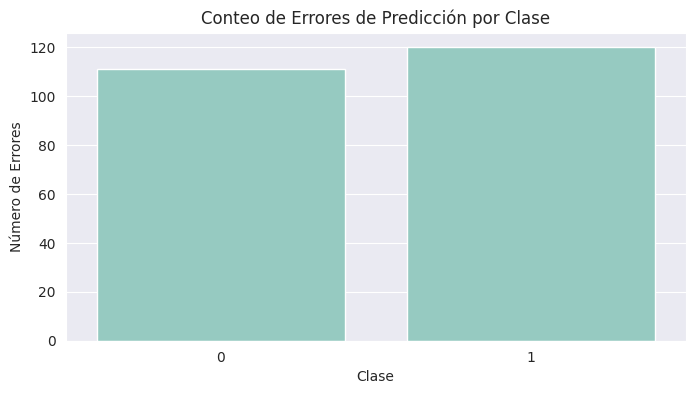

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar errores por clase
error_counts = errors['Actual'].value_counts()
# Gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x=error_counts.index, y=error_counts.values)
plt.title('Conteo de Errores de Predicción por Clase')
plt.xlabel('Clase')
plt.ylabel('Número de Errores')
plt.show()

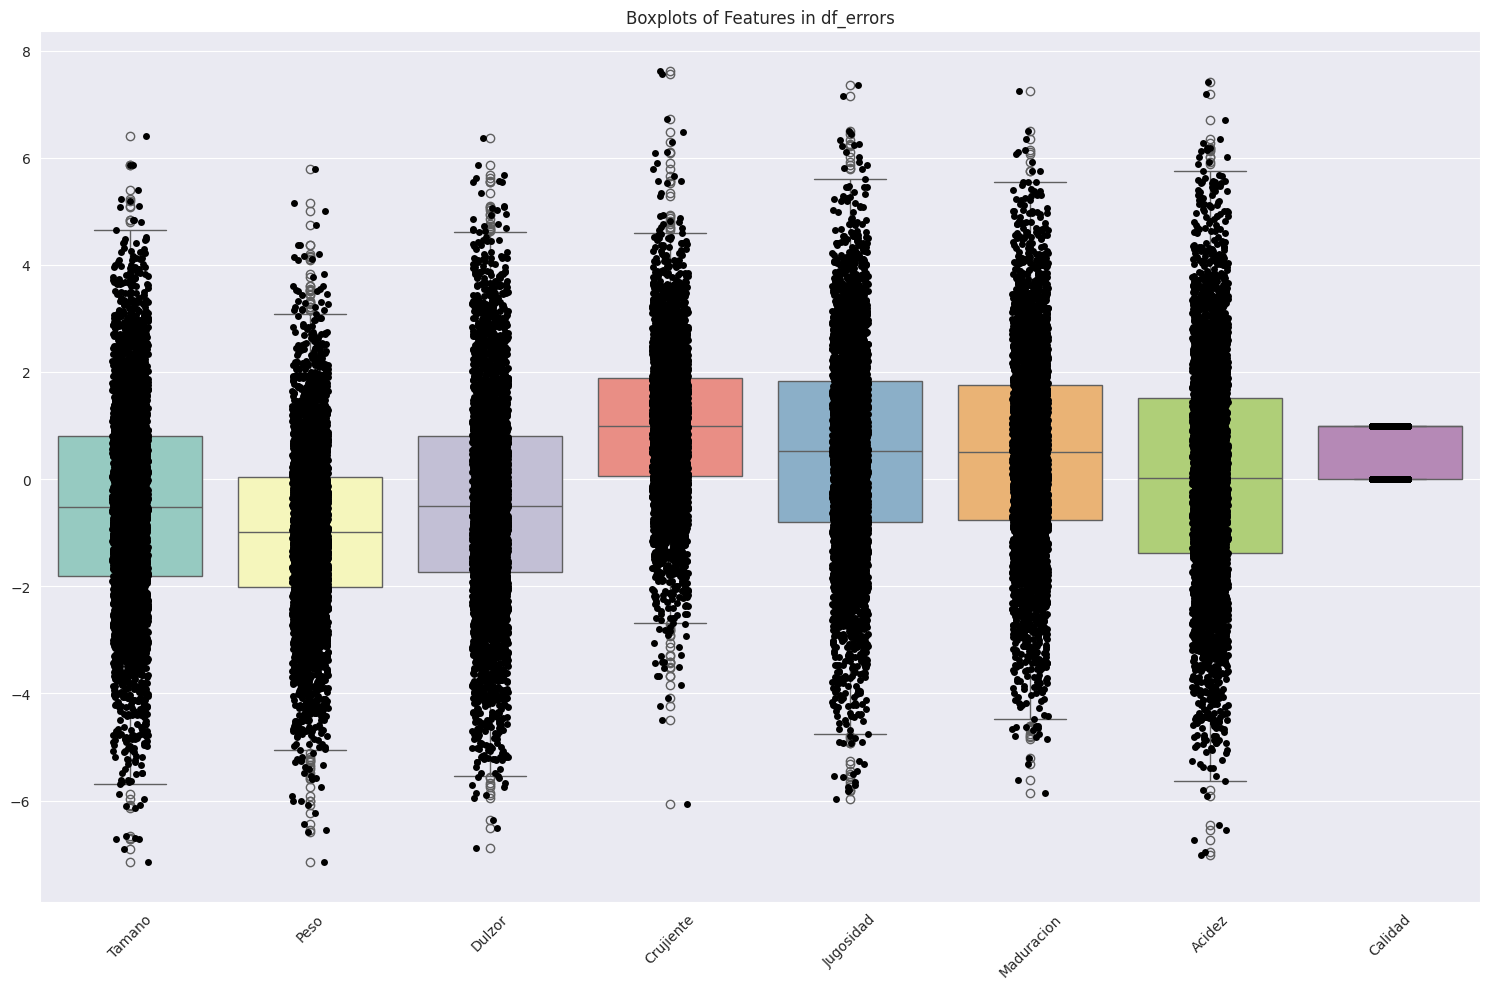

In [ ]:
def box_plot(data):

    # Create a boxplot for each feature in the df_errors DataFrame
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data)
    plt.title('Boxplots of Features in df_errors')
    #add scatter plot
    sns.stripplot(data=data, color='black')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()
box_plot(dt_frutas)

### 6.0 CONCLUSIONES.
*Los modelos se entrenaron con el 70% de los datos del dataset, se probaron con el 24% y finalmente se validaron con el 6% restante. Con esa información se concluye que:*
- *El clasificador de los vecinos más cercanos, con un KNN=17, se identificó como el mejor modelo en función de una evaluación integral utilizando métricas como presición, exactitud, recuperación y putuación f1, con un puntaje de 0.91 y un área bajo la curva de 0.91*
- *El clasificador de vectores de soporte (SVC) también se identificó como un modelo óptimo en función de una evaluación integral utilizando métricas como precisión, exactitud, recuperación y puntuación F1. Con una puntuación de 0.90 y un área bajo la curva de 0.90*
- *El modelo de regresión logística se muestra como un modelo que no es óptimo frente a SVC y KNN, ya que presenta un puntaje de 0.76 en las méricas y el área bajo la curva.*

###*Recomendaciones para un futuro*

*Ajuste de Hiperparámetros: se puede ajustar los hiperparámetros del modelo SVC y KNN como el tipo de kernel (linear, rbf, etc.), para mejorar su rendimiento. Si se usa el kernel rbf, es posible que también se requiera ajustar los parámetros C y gamma.*

*GridSearchCV es un método para buscar exhaustivamente los mejores parámetros candidatos de la cuadrícula de parámetros dados. Es útil cuando buscamos el mejor parámetro para el modelo objetivo y el conjunto de datos. También se lo denomina método de búsqueda exhaustiva, ya que es un enfoque de fuerza bruta para encontrar parámetros óptimos para la predicción.*


###*Referencias*
- *Material bibliográfico de la plataforma TalentoTech*
- *Material Bibliográfico  y aportes del instructor (Andrés Felipe Escallón Portilla) y el monitor(Abel Fernando Becerra Carrillo).*
- *[Datase Apple Quality] https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality.*
- *https://github.com/faris771/Apple_Quality_Classifier/blob/master/main.ipynb.*
- *Diferentes consultas a través de la plataforma: https://chatgpt.com/.*
  - *modelo knn para dataset apple quality.*
  - *modelo svc para dataset apple quality.*
  - *modelo regresión logística para dataset apple quality.*
  - *clasificación de errores modelo de regresion logistica con set apple quality*
- *https://www.youtube.com/playlist?list=PLlrxD0HtieHjNnGcZ1TWzPjKYWgfXSiWG. [17 videos]*
- *https://microsoft.github.io/ML-For-Beginners/#/.*

